### Task 1: Understanding and Manipulating an Image

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
#Read the image
image_path = 'Picture2.jpg'
image = cv2.imread(image_path)

Displaying the original image:


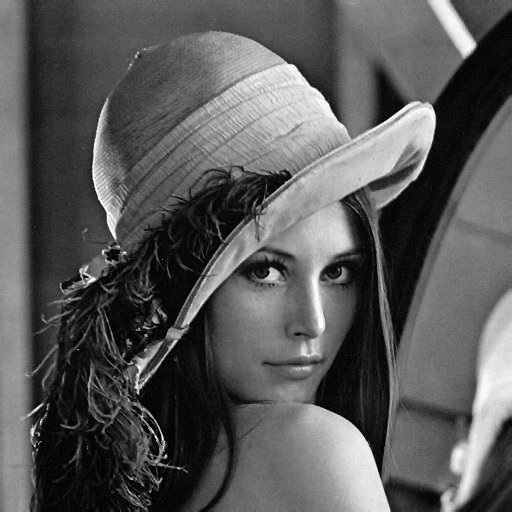

In [ ]:
#Display the image
print("Displaying the original image:")
cv2_imshow(image)

In [ ]:
#Extraction of Image size
height, width, channels = image.shape
print("\nImage Size:")
print(f"Width: {width} pixels, Height: {height} pixels, Channels: {channels}")


Image Size:
Width: 512 pixels, Height: 512 pixels, Channels: 3


In [ ]:
#Calculation of total image pixels
total_pixels = height * width
print(f"Total Pixels in the Image: {total_pixels}")

Total Pixels in the Image: 262144



Displaying RGB image:


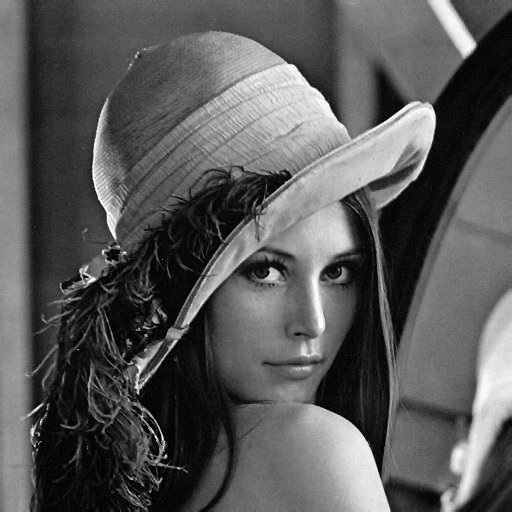

In [ ]:
#Convert BGR to RGB
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print("\nDisplaying RGB image:")
cv2_imshow(rgb_image)


Displaying Grayscale image:


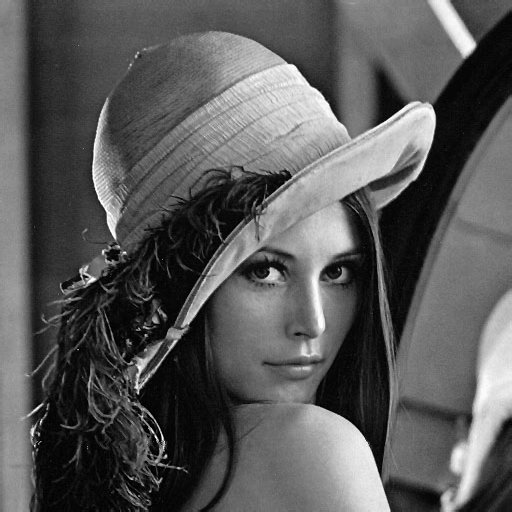

In [ ]:
#Convert RGB to Grayscale
gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)
print("\nDisplaying Grayscale image:")
cv2_imshow(gray_image)

In [ ]:
# Save grayscale image
gray_image_path = "grayscale_Picture2.jpg"
cv2.imwrite(gray_image_path, gray_image)

True


Displaying Binary image:


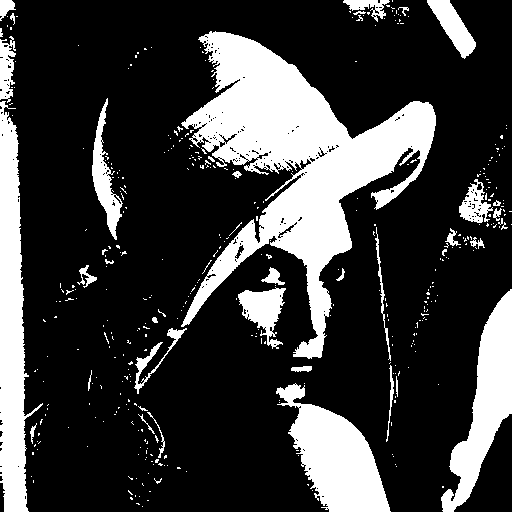

In [ ]:
#Convert Grayscale to Binary Image using Threshold
threshold_value = 128
_, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
print("\nDisplaying Binary image:")
cv2_imshow(binary_image)

In [ ]:
binary_image_path = "binary_Picture2.jpg"
cv2.imwrite(binary_image_path, binary_image)

black_pixel_count = np.sum(binary_image == 0)

print(f"\nArea of Black Pixels: {black_pixel_count}")
print(f"Size of Image (Total Pixels): {total_pixels}")


Area of Black Pixels: 200715
Size of Image (Total Pixels): 262144


##Task 2: Image Manipulation and Analysis

1. Perform Edge Detection

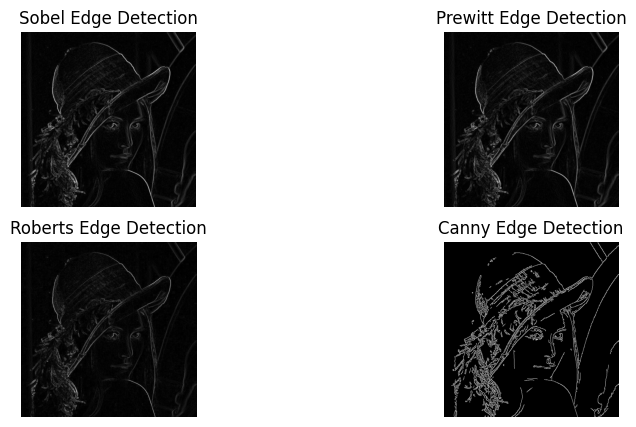

In [ ]:
from skimage.filters import sobel, prewitt, roberts
import matplotlib.pyplot as plt

# Edge detection
sobel_edges = sobel(gray_image)
prewitt_edges = prewitt(gray_image)
roberts_edges = roberts(gray_image)
canny_edges = cv2.Canny(gray_image, 100, 200)
# Display edge detection results
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(prewitt_edges, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(roberts_edges, cmap='gray')
plt.title('Roberts Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()


2. Perform Image Segmentation

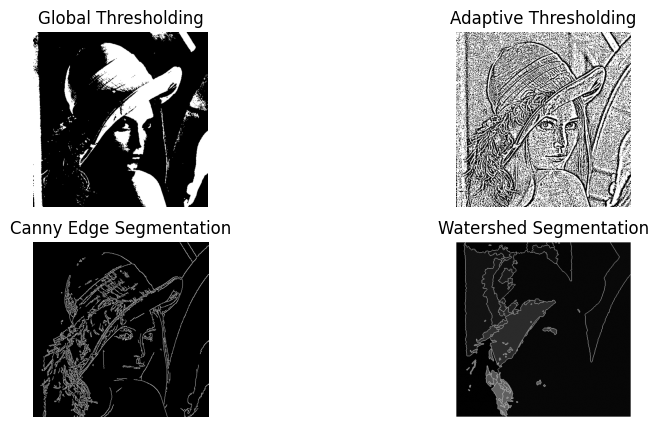

In [ ]:
# Global Thresholding
_, global_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
# Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)
# Watershed Segmentation
gray_blur = cv2.GaussianBlur(gray_image, (5, 5), 0)
ret, markers = cv2.connectedComponents(cv2.threshold(gray_blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1])
markers = cv2.watershed(rgb_image, markers)
watershed_result = np.uint8(markers)

# Display segmentation results
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.imshow(global_thresh, cmap='gray')
plt.title('Global Thresholding')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Adaptive Thresholding')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Segmentation')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(watershed_result, cmap='gray')
plt.title('Watershed Segmentation')
plt.axis('off')
plt.show()